In [1]:
import sys
import os
import torch
import matplotlib.pyplot as plt
import json
from torchvision.utils import make_grid

# Add src to path so we can import modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.config import Config
from src.models import Generator
from src.utils import generate_sample_grid

In [2]:
def load_model(model_type, checkpoint_path):
    config = Config(model_type=model_type)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    G = Generator(config).to(device)
    
    if os.path.exists(checkpoint_path):
        checkpoint = torch.load(checkpoint_path, map_location=device)
        if 'state_dict' in checkpoint:
            G.load_state_dict(checkpoint['state_dict'])
        else:
            G.load_state_dict(checkpoint)
        print(f"Loaded {model_type} model from {checkpoint_path}")
    else:
        print(f"Checkpoint not found: {checkpoint_path}")
        
    G.eval()
    return G, config, device

In [3]:
# Paths to checkpoints (Update these to point to your actual checkpoint files)
vanilla_ckpt = '../checkpoints/checkpoint_vanilla_50.pth.tar'
wgan_ckpt = '../checkpoints/checkpoint_wgan_50.pth.tar'

# Load models
G_vanilla, config_v, device = load_model('vanilla', vanilla_ckpt)
G_wgan, config_w, _ = load_model('wgan', wgan_ckpt)

Loaded vanilla model from ../checkpoints/checkpoint_vanilla_50.pth.tar
Loaded wgan model from ../checkpoints/checkpoint_wgan_50.pth.tar


## Generated Samples
Generating a grid where each row corresponds to a class (0-9).

Vanilla GAN Results:


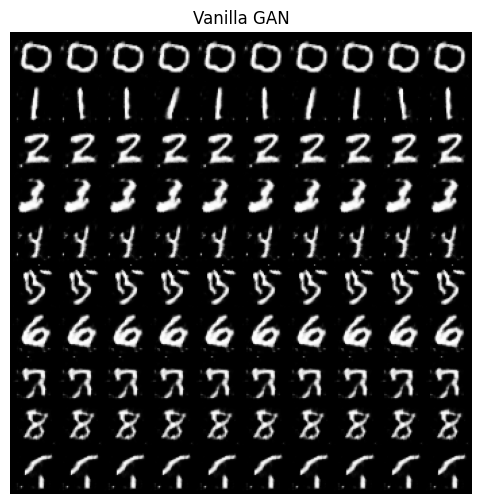

WGAN Results:


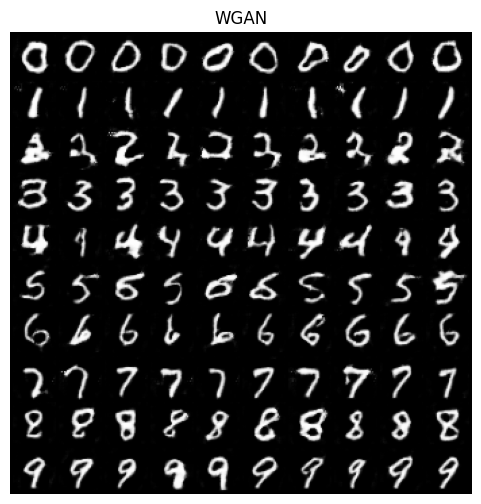

In [4]:
def show_grid(generator, title):
    # Generate grid: 10 classes, 10 samples each
    grid = generate_sample_grid(generator, device, config_v.LATENT_DIM, config_v.NUM_CLASSES, n_row=10)
    
    # Grid is (C, H, W), permute to (H, W, C) for matplotlib
    grid_np = grid.permute(1, 2, 0).cpu().numpy()
    
    plt.figure(figsize=(6, 6))
    plt.imshow(grid_np)
    plt.axis('off')
    plt.title(title)
    plt.show()

print("Vanilla GAN Results:")
show_grid(G_vanilla, "Vanilla GAN")

print("WGAN Results:")
show_grid(G_wgan, "WGAN")

## Training Loss Curves

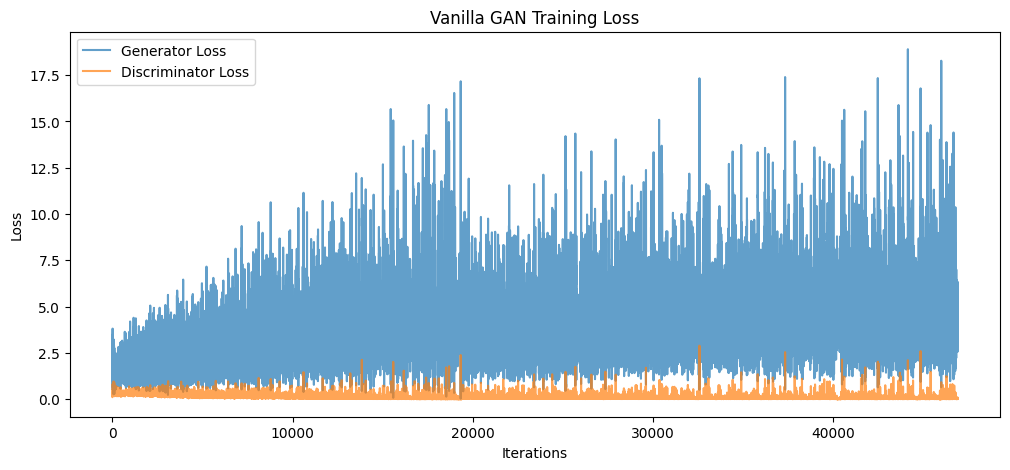

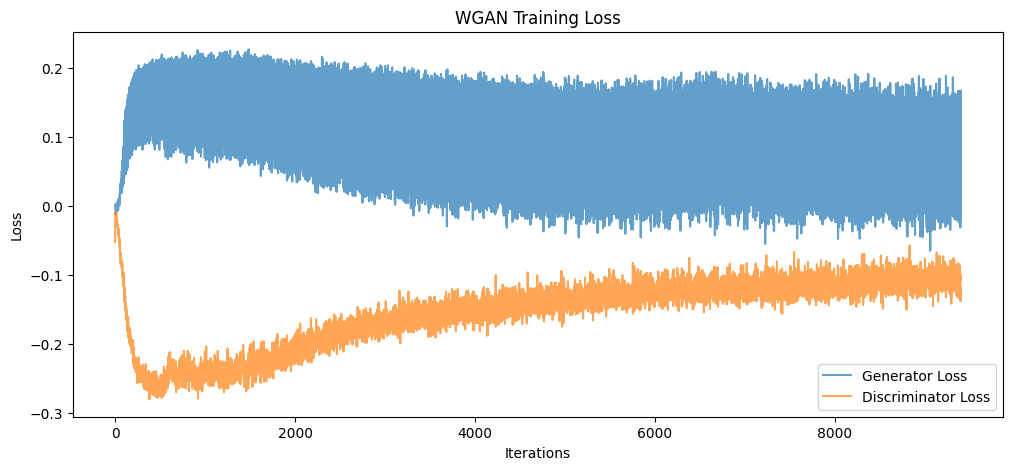

In [5]:
def plot_logs(log_path, title):
    if os.path.exists(log_path):
        with open(log_path, 'r') as f:
            logs = json.load(f)
        
        plt.figure(figsize=(12, 5))
        plt.plot(logs['g_losses'], label='Generator Loss', alpha=0.7)
        plt.plot(logs['d_losses'], label='Discriminator Loss', alpha=0.7)
        plt.title(title)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    else:
        print(f"Log file not found: {log_path}")

plot_logs('../logs/logs_vanilla.json', "Vanilla GAN Training Loss")
plot_logs('../logs/logs_wgan.json', "WGAN Training Loss")